In [9]:
using Plots,FileIO
using LinearAlgebra
include("GKTooLkit.jl");

In [3]:
#measurement induced entanglement phase transition
ns=[8,16,32,64]
ees=[]
averagenum=100
ps=collect(0.1:0.01:0.2)

for n in ns
    print("\n$n: ")
    
    ee=[]
    for p in ps
        print("$p, ")
        halflengthee=0
        
        for r=1:averagenum
            
            stab=zproductstate(n)
            measurementbasis=zproductstate(n)
            
            for t=1:n
                for j=1+t%2:2:n-1
                    applyunitary!(stab, randomunitary(2),[j,j+1])
                end
                for j=1:n
                    if rand()<p
                        measurestabilizer!(stab, measurementbasis[j,:])
                    end
                end
            end
            
            halflengthee+=entanglement(stab,collect(1:n÷2))
        end
        
        push!(ee,halflengthee/averagenum)
    end
    push!(ees,ee)
end







8: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 
16: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 
32: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 
64: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 

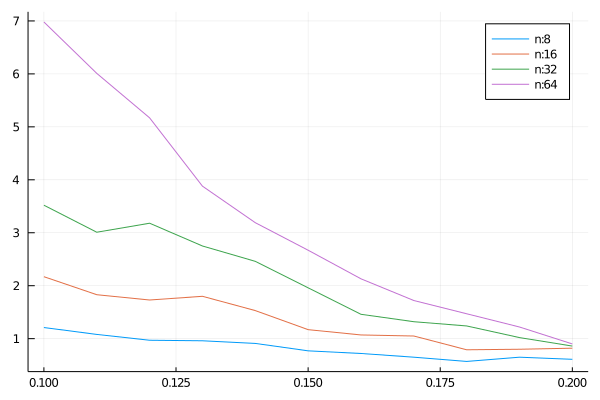

In [4]:
plt=plot()

for i=1:length(ns)
    n=ns[i] 
#     if n<32 continue end
    plot!(plt,ps,ees[i],label="n:$n")
end
display(plt)

In [5]:
#Ancila order parameter with scrambeling
ns=[8,16,32,64]
ees=[]
averagenum=1000
ps=collect(0.0:0.05:0.3)
ancillanum=1

for n in ns
    print("\n$n: ")
    
    ee=[]
    for p in ps
        print("$p, ")
        ancillaee=0
        
        
        for r=1:averagenum
            
            stab=zproductstate(n)
            stabsign=zeros(UInt8,n)
            stab,stabsign=addqubit(stab,ancillanum,stabsign)
            
            measurementbasis=zproductstate(n+ancillanum)
            for t=1:10
                for j=1:n+ancillanum
                    applyunitary!(stab, randomunitary(2),sample(1:n+ancillanum,2,replace=false))
                end
            end
            
            for t=1:2n
                for j=1+t%2:2:n
                    applyunitary!(stab, randomunitary(2),[j,j%n+1])
                end
                for j=1:n
                    if rand()<p
                        measurestabilizer!(stab, measurementbasis[j,:])
                    end
                end
            end
            
            ancillaee+=entanglement(stab,n+1:n+ancillanum)
        end
        
        push!(ee,ancillaee/averagenum)
    end
    push!(ees,ee)
end



8: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
16: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
32: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
64: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 

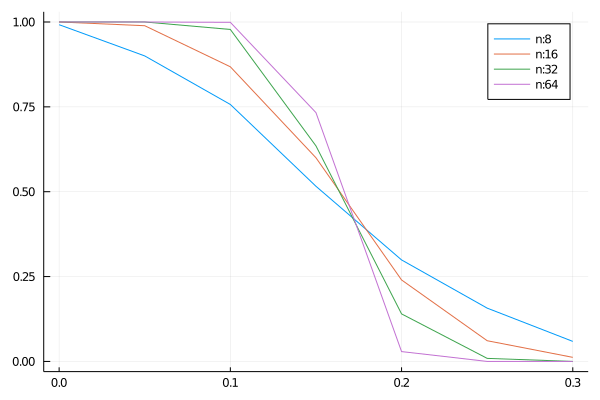

In [7]:
plt=plot()

for i=1:length(ns)
    n=ns[i] 
#     if n<32 continue end
    plot!(plt,ps,ees[i],label="n:$n")
end
display(plt)

In [8]:
#Ancilla order parameter, locally entangled referece qubit
ns=[8,16,32,64]
ees=[]
averagenum=1000
ps=collect(0.0:0.05:0.3)
ancillanum=1

for n in ns
    print("\n$n: ")
    
    ee=[]
    for p in ps
        print("$p, ")
        ancillaee=0
        
        
        for r=1:averagenum
            
            stab=zproductstate(n)
            stabsign=zeros(UInt8,n)
            stab,stabsign=addqubit(stab,ancillanum,stabsign)
            
            measurementbasis=zproductstate(n+ancillanum)
            
            xxstabilizer=zeros(UInt8,2(n+1))
            xxstabilizer[n]=1
            xxstabilizer[n+1]=1

            measurestabilizer!(stab, xxstabilizer,stabsign)
            
            for t=1:2n
                for j=1+t%2:2:n
                    applyunitary!(stab, randomunitary(2),[j,j%n+1])
                end
                for j=1:n
                    if rand()<p
                        measurestabilizer!(stab, measurementbasis[j,:])
                    end
                end
            end
            
            ancillaee+=entanglement(stab,n+1:n+ancillanum)
        end
        
        push!(ee,ancillaee/averagenum)
    end
    push!(ees,ee)
end



8: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
16: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
32: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
64: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 

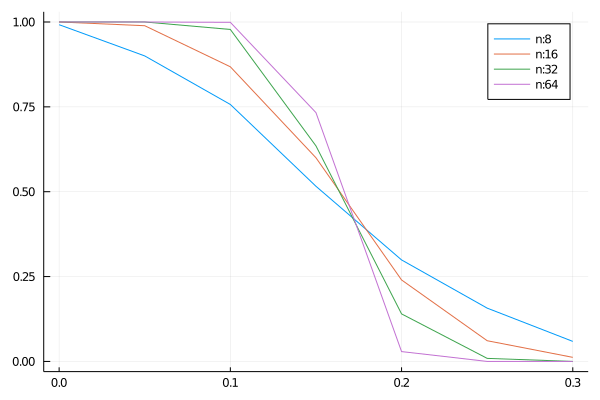

In [6]:
plt=plot()

for i=1:length(ns)
    n=ns[i] 
#     if n<32 continue end
    plot!(plt,ps,ees[i],label="n:$n")
end
display(plt)